# Explicación de `data augmentation`

**Autor:** Jazna Meza Hidalgo

**Correo Electrónico:** ja.meza@profesor.duoc.cl

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

`data augmentation` consiste en una técnica para poder mejorar el rendimiento de una red convolucional.

`data augmentation` se basa en generar variadas imágenes a partir de una, estas nuevas imágenes consisten en variantes (rotada, volteada, escalada, entre otras opciones) lo que ayuda a **entrenar modelos más robustos** evitando, de esa forma, el `overfitting`.

Este notebook incluye un ejemplo de uso de esta técnica

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [ ]:
!wget https://raw.githubusercontent.com/JaznaLaProfe/Deep-Learning/master/imagenes/images.jpeg

--2025-05-01 23:59:22--  https://raw.githubusercontent.com/JaznaLaProfe/Deep-Learning/master/imagenes/images.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7283 (7.1K) [image/jpeg]
Saving to: ‘images.jpeg’

images.jpeg         100%[===================>]   7.11K  --.-KB/s    in 0s      

2025-05-01 23:59:22 (79.9 MB/s) - ‘images.jpeg’ saved [7283/7283]



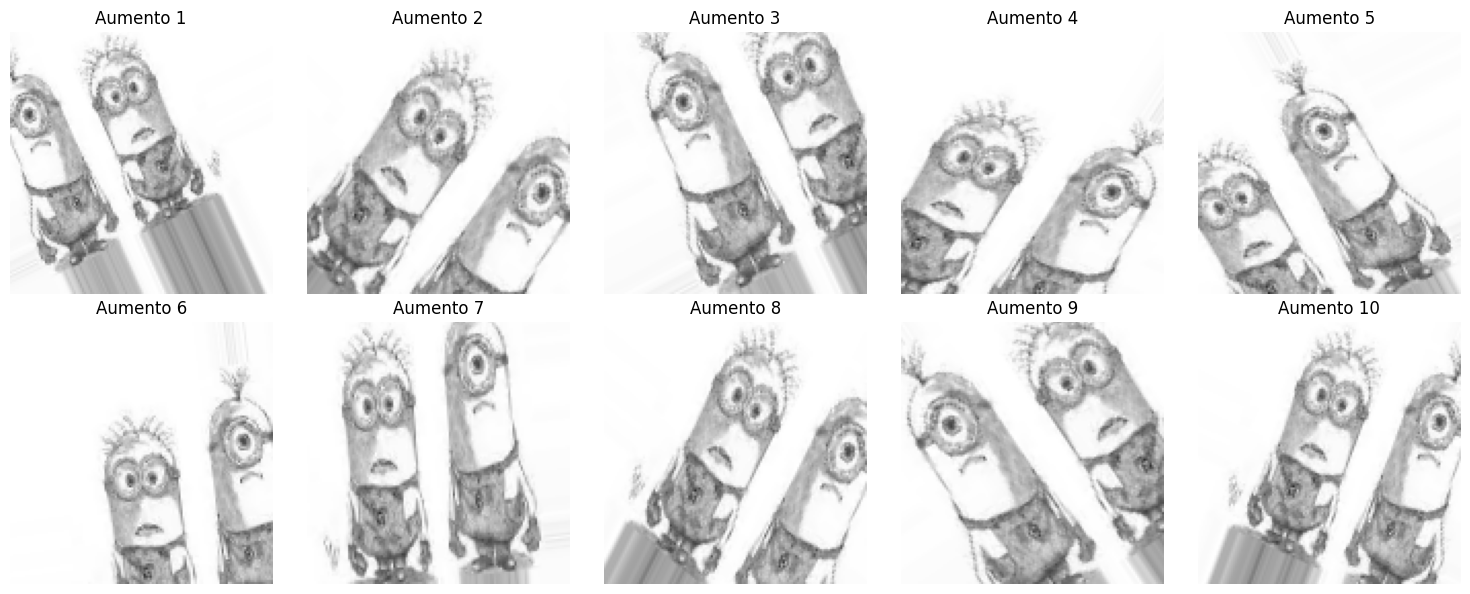

In [ ]:
# Cargar una imagen de ejemplo
img = load_img('images.jpeg', target_size=(128, 128))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Formato (1, altura, ancho, canales)

# Definir el generador de aumentación
datagen = ImageDataGenerator(
    rotation_range=40,       # Rotaciones aleatorias de hasta 40 grados
    width_shift_range=0.2,   # Desplazamientos horizontales
    height_shift_range=0.2,  # Desplazamientos verticales
    shear_range=0.2,         # Transformaciones angulares
    zoom_range=0.2,          # Zoom aleatorio
    horizontal_flip=True,    # Volteo horizontal
    fill_mode='nearest'      # Relleno de píxeles vacíos
)

# Crear un generador y visualizar algunas imágenes
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

# Generar 10 imágenes aumentadas
for i, batch in enumerate(datagen.flow(img_array, batch_size=1)):
    if i == 10:
        break
    ax = axes[i]
    ax.imshow(batch[0].astype('uint8'))
    ax.axis('off')
    ax.set_title(f'Aumento {i+1}')

plt.tight_layout()
plt.show()


# Consideraciones

+ Aplicar `data augmentation` en una red convolucional **no requiere modificar la artuitqctura de la red**, esta técnica se aplica **ANTES de que los datos entren a la red** como parte del preprocesamiento.

+ El objetivo es aumentar la diversidad de los datos de entrenamiento mediante transformaciones como rotaciones, desplazamientos, zoom, inversión horizontal, entre otras. Esto permite mejorar la capacidad de generalización del modelo, es decir, evita el overfitting.